# Naive Bayes

### Multinomial Naive Bayes

In [1]:
# Import nucessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


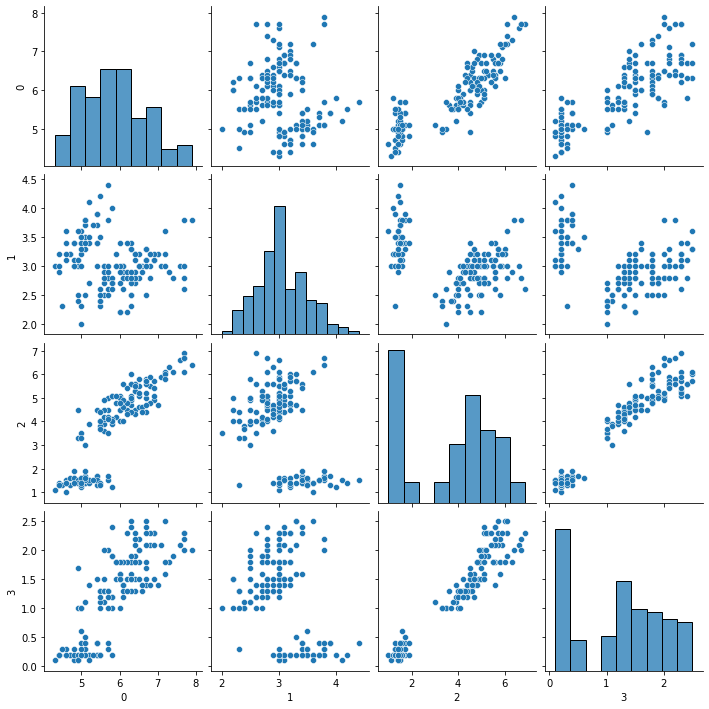

In [7]:
ds=pd.DataFrame(data=iris.data)
print(ds)
sns.pairplot(ds)

In [8]:
x=iris.data
y=iris.target

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=50)

In [10]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7878787878787878
[[ 9  0  0]
 [ 0  7  7]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.50      0.67        14
           2       0.59      1.00      0.74        10

    accuracy                           0.79        33
   macro avg       0.86      0.83      0.80        33
weighted avg       0.88      0.79      0.78        33



# Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train, y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9696969696969697
[[ 9  0  0]
 [ 0 13  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        33
   macro avg       0.97      0.98      0.97        33
weighted avg       0.97      0.97      0.97        33



# K-Nearest Neighbors Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9393939393939394
[[ 9  0  0]
 [ 0 12  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        33
   macro avg       0.94      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



# Support Vector Classifer

In [15]:
from sklearn.svm import SVC

In [16]:
svc=SVC(kernel='rbf')  #kernel='rbf' is default
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predsvc=knn.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9393939393939394
[[ 9  0  0]
 [ 0 12  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        33
   macro avg       0.94      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



In [17]:
svc=SVC(kernel='poly')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predsvc=knn.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9393939393939394
[[ 9  0  0]
 [ 0 12  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        33
   macro avg       0.94      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



In [18]:
svc=SVC(kernel='linear')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predsvc=knn.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9393939393939394
[[ 9  0  0]
 [ 0 12  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        33
   macro avg       0.94      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



### Using a Function

In [19]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predsvc=knn.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [20]:
svmkernel('rbf')

0.9393939393939394
[[ 9  0  0]
 [ 0 12  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        33
   macro avg       0.94      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



In [21]:
svmkernel('poly')

0.9393939393939394
[[ 9  0  0]
 [ 0 12  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        33
   macro avg       0.94      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



In [22]:
df1=pd.DataFrame(predsvc)
df1.to_csv('svc_prediction.csv')

# Saving the best file

In [23]:
import joblib

joblib.dump(dtc,'dtcfile.obj')



['dtcfile.obj']

In [24]:
dtc_from_joblib=joblib.load('dtcfile.obj')

dtc_from_joblib.predict(x_test)

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1])

In [25]:
import pickle

filename='pickledtcfile.pkl'

pickle.dump(dtc,open(filename, 'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(x_test)

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1])

In [26]:
model=[DecisionTreeClassifier(), SVC(), MultinomialNB(), KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=knn.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')
    

0.9393939393939394
[[ 9  0  0]
 [ 0 12  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        33
   macro avg       0.94      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



0.9393939393939394
[[ 9  0  0]
 [ 0 12  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        33
   macro avg       0.94      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



0.9393939393939394
[[ 9  0  0]
 [ 0 12  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           